## Exploratory Data Analysis for Bank Telemarketing Data

In this notebook, we will perform Exploratory Data Analysis (EDA) on a bank telemarketing dataset.
The goal is to understand the data better and prepare it for machine learning models.

#### Plans:
1. **Summary Statistics**: Quick numbers to describe the data.
2. **Missing Values**: Check if any data is missing.
3. **Visualizations**: Create charts and graphs for find out the insights from the features.
4. **Features Correlations**: Create correlation plots of features.
5. **Features Importance**: Find out the important features.

#### **Summary Statistics**: Quick numbers to describe the data.

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/ML Assessment Dataset (Bank Data) - Sheet1.csv'  # Update the path as needed
df = pd.read_csv(file_path)

# Show the first few rows of the DataFrame
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
# Generate summary statistics for the data
summary_stats = df.describe(include='all')
summary_stats


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


**Observations**:
* Age: The average age is about 41 years. The youngest person is 19 and the oldest is 87.
* Job: The most common job type is "management".
* Marital Status: Most people are married.
* Education: Most people have a "secondary" level of education.
* Default: Very few people have credit in default. Most have "no" in this column.
* Balance: The average bank balance is about 1423 Euros. Some have a negative balance, while the highest is 71,188 Euros.
* Housing: Most people have a housing loan.
* Loan: Most people do not have a personal loan.
* Contact: The most common method of contact is "cellular".
* Day: Contacts are made throughout the month, with the average day being around the 16th.
* Month: May is the most common month for contact.
* Duration: The average duration of contact is about 264 seconds.
* Campaign: On average, people are contacted about 3 times during a campaign.
* Pdays: Most people haven't been contacted before.
* Previous: Most people have zero contacts before the current campaign.
* Poutcome: The outcome of the previous campaign is mostly "unknown".
* Y (Target): Most people have not subscribed to a term deposit.

#### **Missing Values**: Check if any data is missing.

In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Observation** : There are no missing values in the dataset. This makes our job easier as we don't have to fill in or remove any missing data.

#### Plotting/Observing Categorical variables

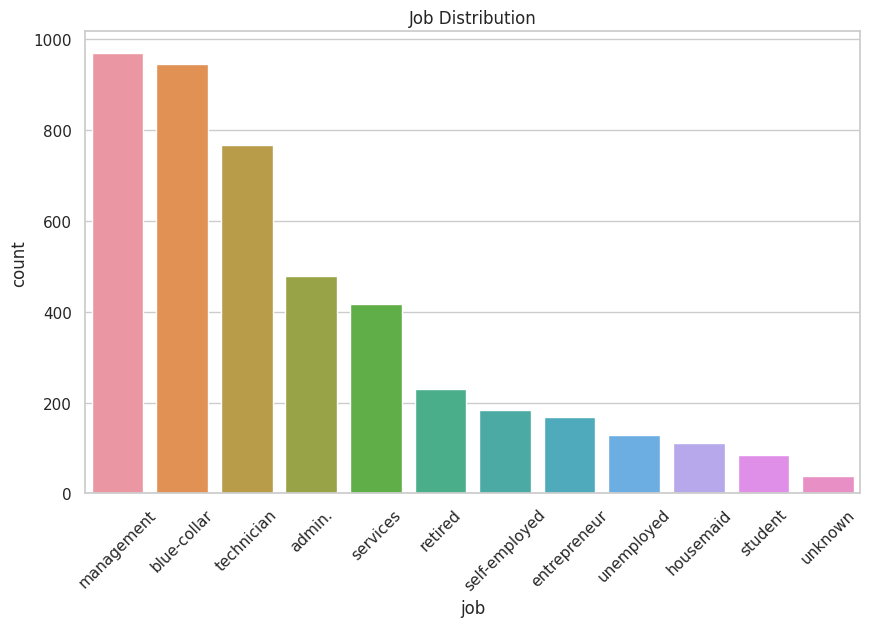

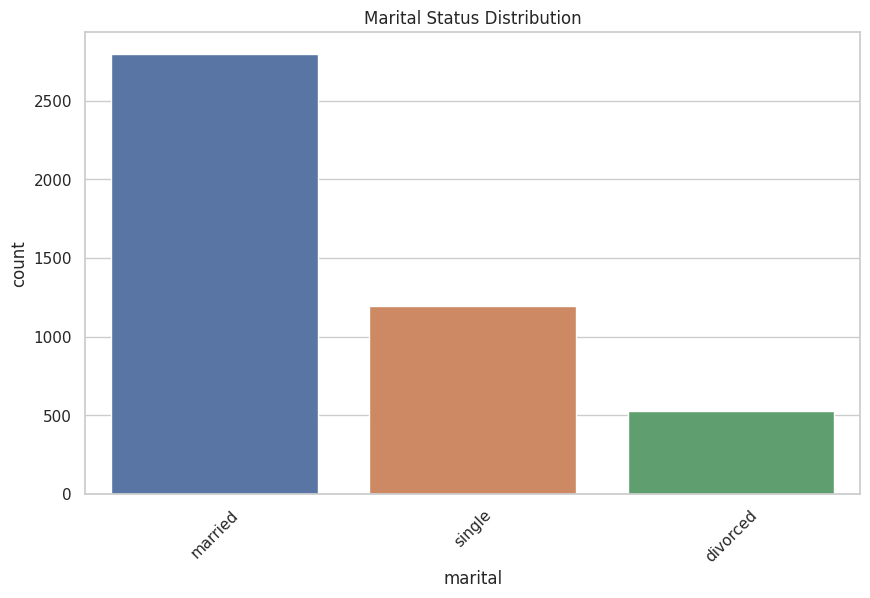

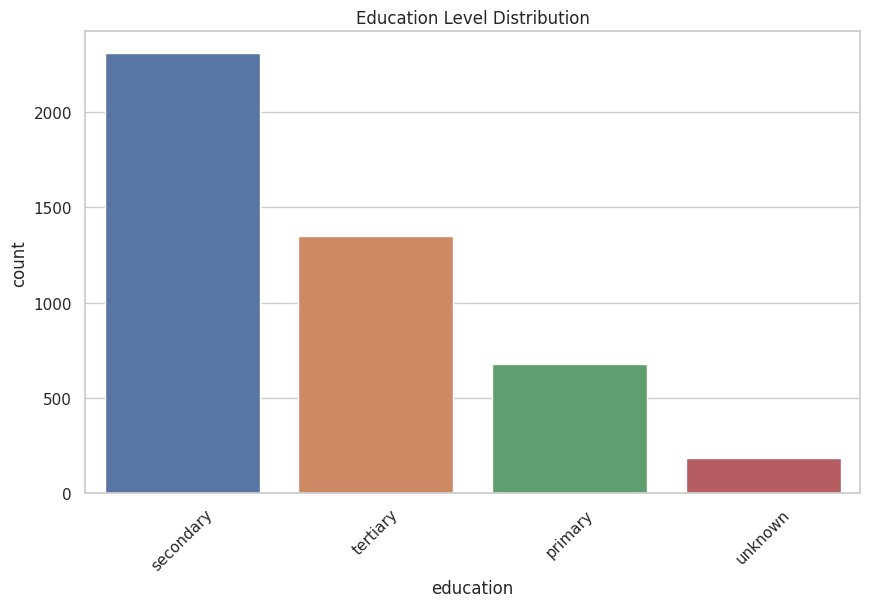

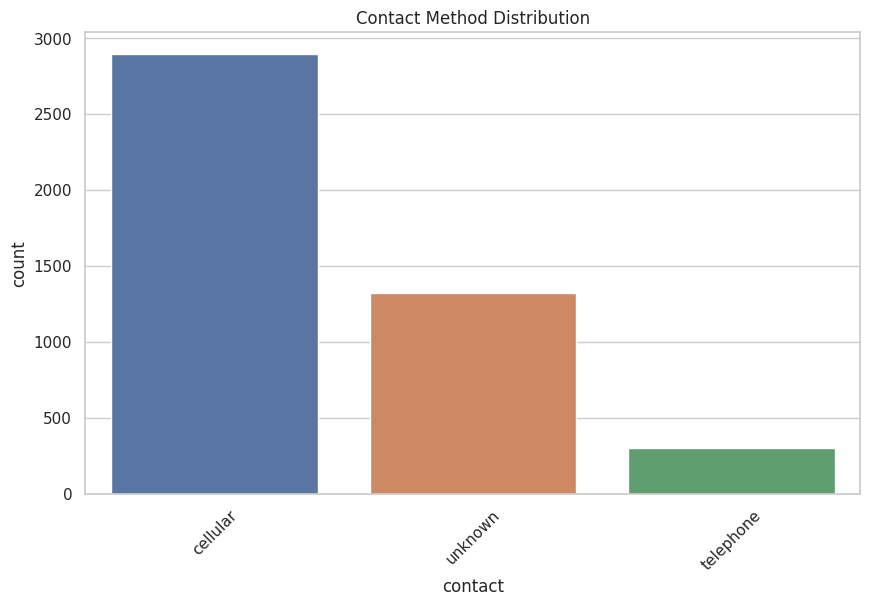

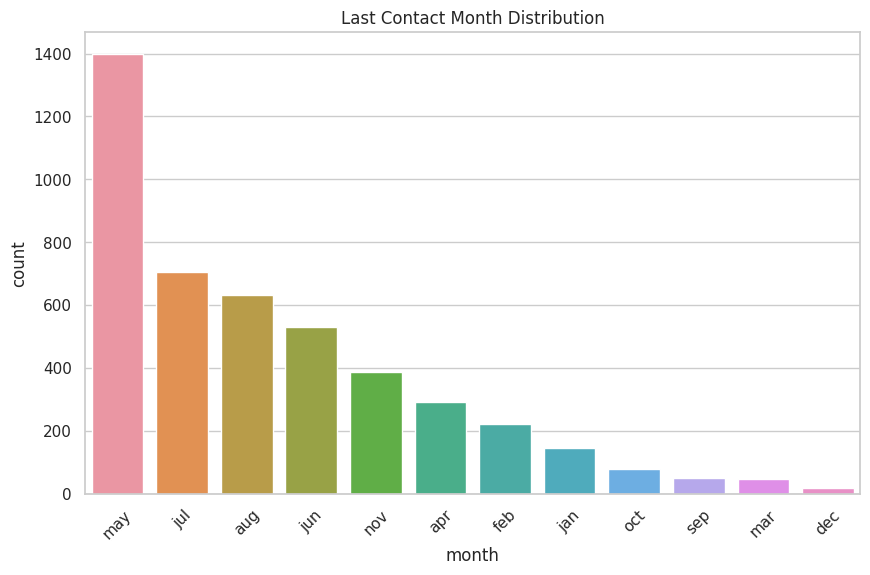

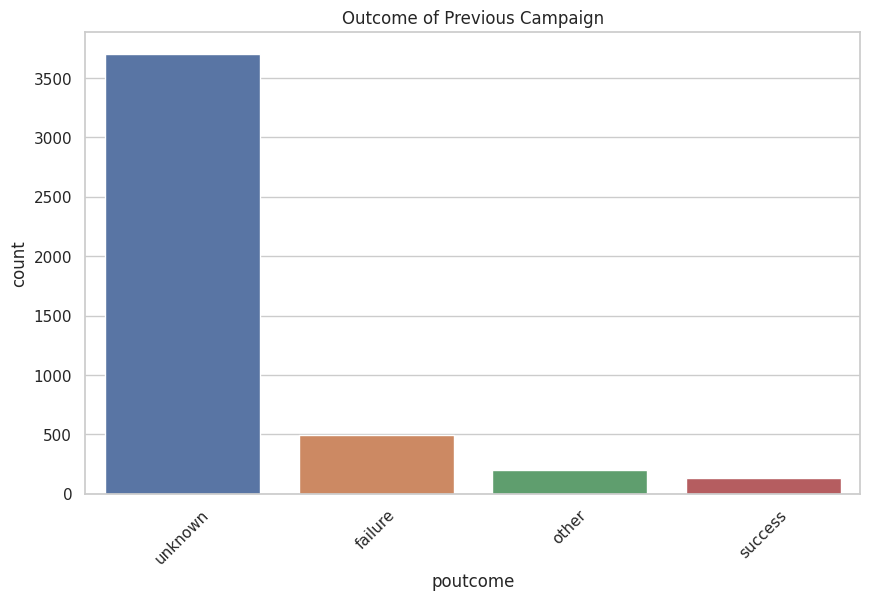

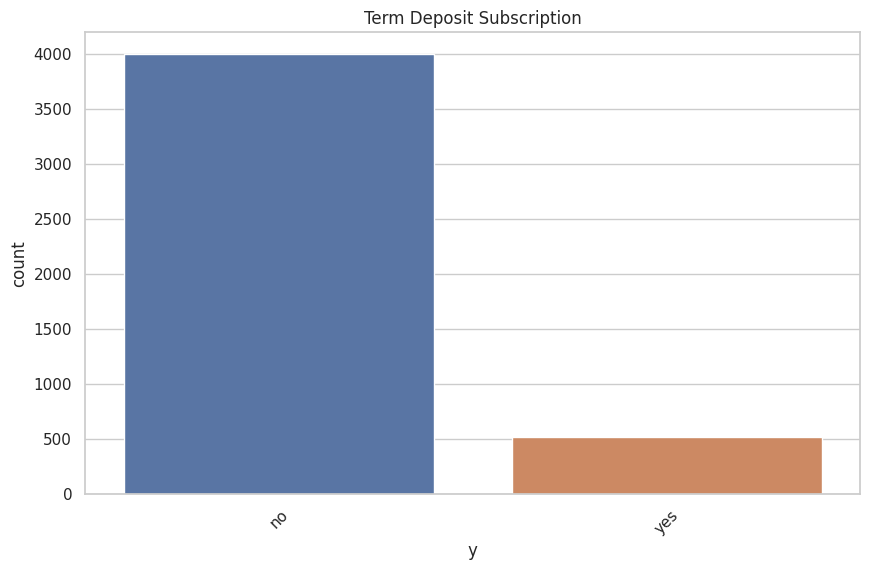

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the visualizations
sns.set(style="whitegrid")

# Create function to generate bar plots for categorical variables
def plot_categorical(data, col, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()



# Plotting some categorical variables
plot_categorical(df, 'job', 'Job Distribution')
plot_categorical(df, 'marital', 'Marital Status Distribution')
plot_categorical(df, 'education', 'Education Level Distribution')
plot_categorical(df, 'contact', 'Contact Method Distribution')
plot_categorical(df, 'month', 'Last Contact Month Distribution')
plot_categorical(df, 'poutcome', 'Outcome of Previous Campaign')
plot_categorical(df, 'y', 'Term Deposit Subscription')


**Observations Categorical Features**


*   Job Distribution: Most people work in management, blue-collar jobs, or are technicians.
*   Marital Status Distribution: The majority are married.
*   Education Level Distribution: Most have a secondary level of education.
*   Contact Method Distribution: Cellular is the most common method of contact.
*   Last Contact Month Distribution: Most contacts were made in the month of May.
*   Outcome of Previous Campaign: For most people, the outcome of the previous campaign is unknown.
*   Term Deposit Subscription: A smaller number of people have subscribed to a term deposit compared to those who haven't.
















#### Plotting/Observing Numerical variables

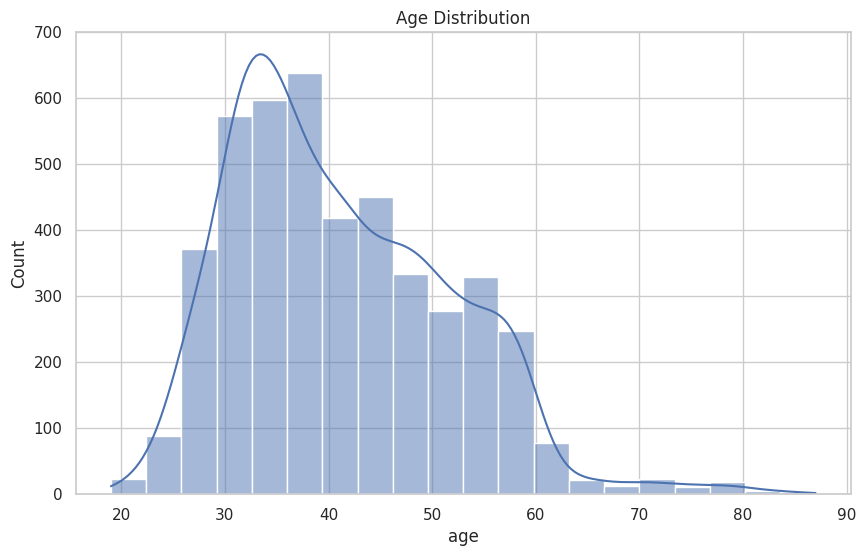

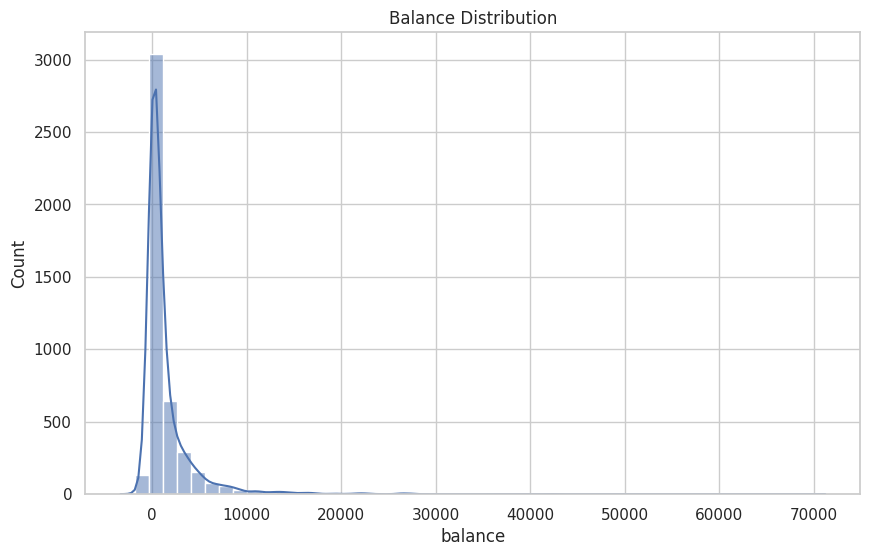

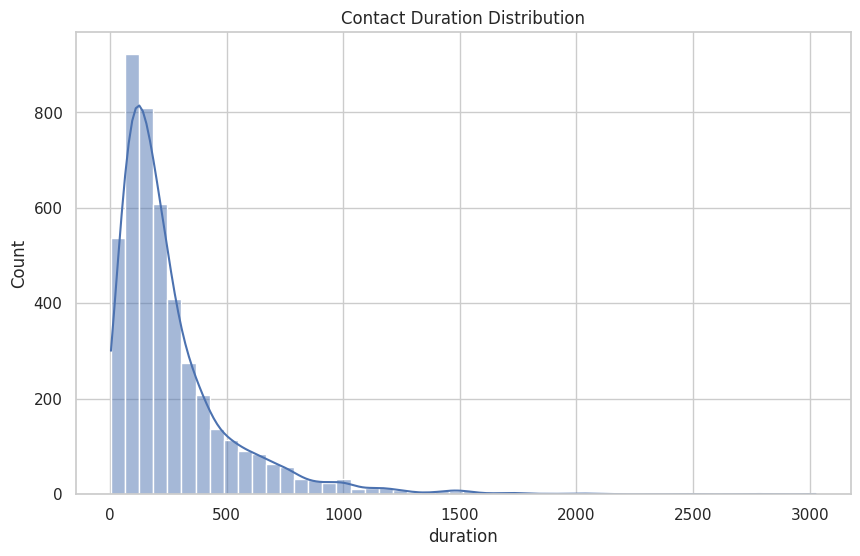

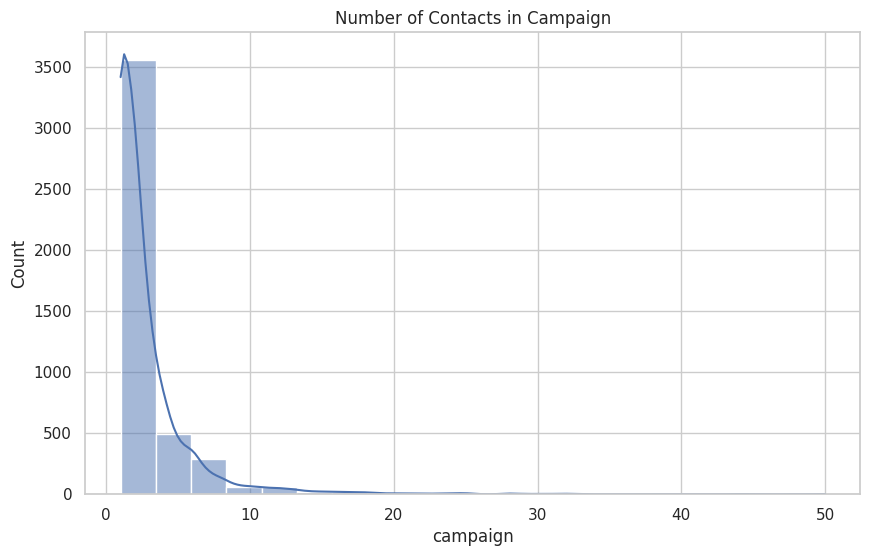

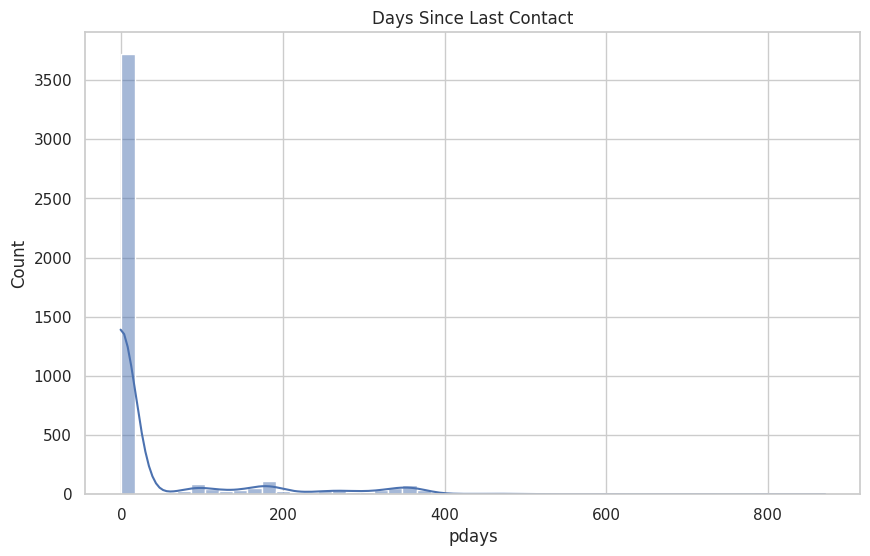

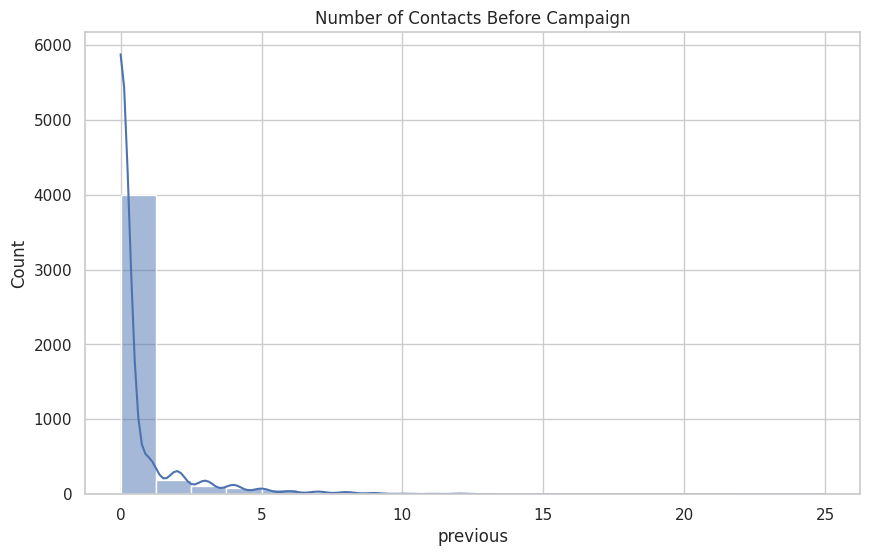

In [5]:
# Create function to generate histograms for numerical variables
def plot_numerical(data, col, bins, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=bins, kde=True)
    plt.title(title)
    plt.show()

# Plotting some numerical variables
plot_numerical(df, 'age', 20, 'Age Distribution')
plot_numerical(df, 'balance', 50, 'Balance Distribution')
plot_numerical(df, 'duration', 50, 'Contact Duration Distribution')
plot_numerical(df, 'campaign', 20, 'Number of Contacts in Campaign')
plot_numerical(df, 'pdays', 50, 'Days Since Last Contact')
plot_numerical(df, 'previous', 20, 'Number of Contacts Before Campaign')


**Observations Numerical Features**

*   Age Distribution: Most people are between 30 and 40 years old.
*   Balance Distribution: Most people have a balance between 0 and 5000 Euros, but there are some outliers with much higher balances.
*   Contact Duration Distribution: Most of the contact durations are less than 500 seconds.
*   Number of Contacts in Campaign: Most people have been contacted less than 10 times in the current campaign.
*   Days Since Last Contact: Most people have not been contacted before (indicated by the spike at -1).
*   Number of Contacts Before Campaign: Most people were not contacted before the current campaign.

#### correlation between numerical variables

<ipython-input-6-a9a583c09ce1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


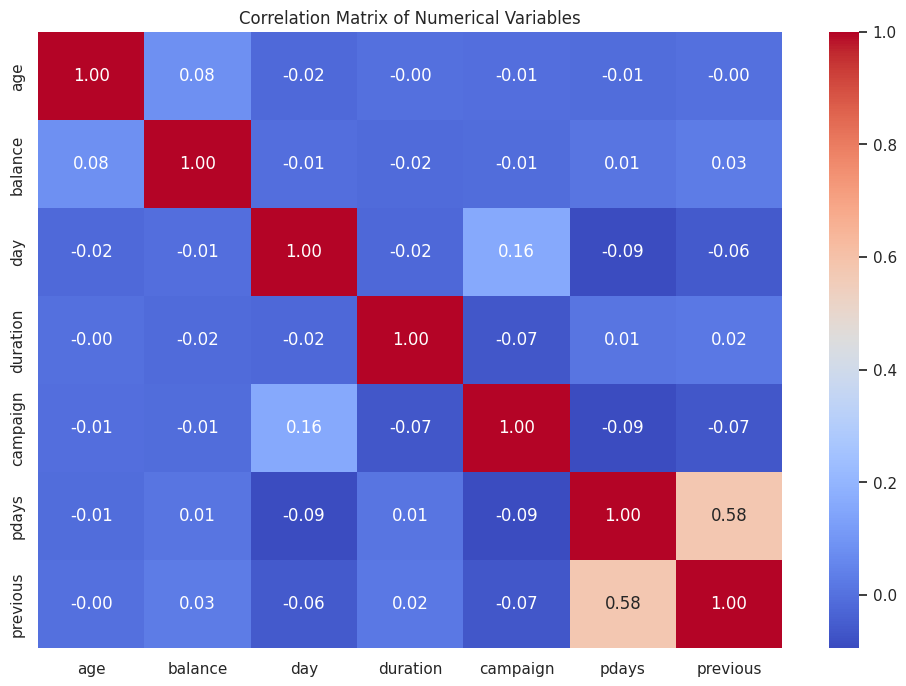

In [6]:
# Generate a correlation matrix for the numerical variables
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


**Indicators**
* The color closer to 1 or -1 means the variables are strongly correlated.
* The color closer to 0 means there's little to no linear correlation.


**Observations**
* `pdays` and `previous` have a correlation of 0.45, which is moderate. This suggests that if a customer was contacted before, it's likely that more days have passed since the last contact.
* `duration` and `campaign` have a slight negative correlation of -0.08, suggesting that more contacts in the campaign could slightly decrease the duration of calls. However, this is not a strong correlation.
* `age` has very low correlation with other numerical variables, indicating that it might not be a strong predictor for other numerical variables in this dataset.

#### correlation of numeric features with the label

<ipython-input-7-5b360df1781d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_label = df.corr()['y_numeric'].sort_values(ascending=False)


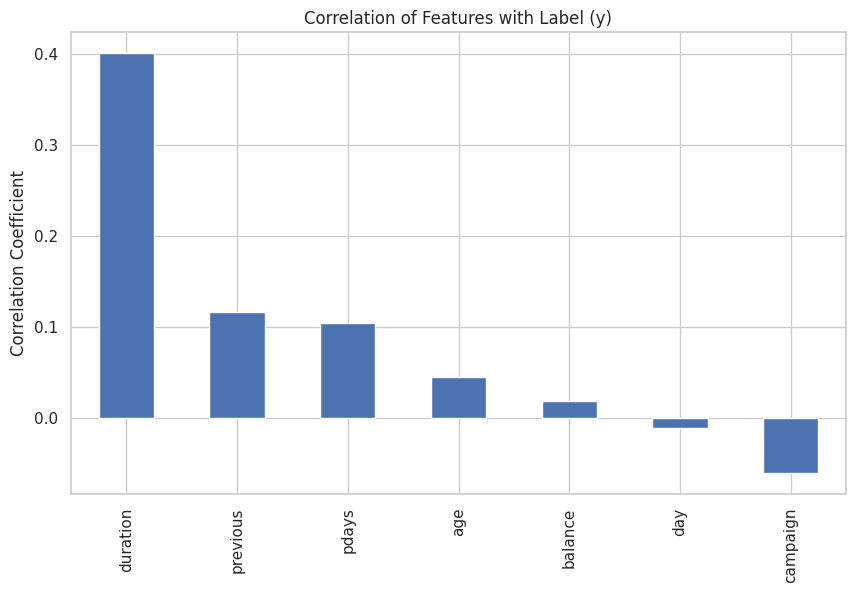

y_numeric    1.000000
duration     0.401118
previous     0.116714
pdays        0.104087
age          0.045092
balance      0.017905
day         -0.011244
campaign    -0.061147
Name: y_numeric, dtype: float64

In [7]:
# Convert the label 'y' to numerical form for correlation analysis
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

# Generate a new correlation matrix including the label 'y'
correlation_with_label = df.corr()['y_numeric'].sort_values(ascending=False)

# Plotting the correlation of all features with the label 'y'
plt.figure(figsize=(10, 6))
correlation_with_label.drop('y_numeric').plot(kind='bar')
plt.title('Correlation of Features with Label (y)')
plt.ylabel('Correlation Coefficient')
plt.show()

# Remove the temporary 'y_numeric' column
df.drop('y_numeric', axis=1, inplace=True)

correlation_with_label

**It indicates whether or not a client has subscribed to a term deposit.**

Observations:
* Duration: It has the highest positive correlation (0.40) with the label. This suggests that longer call durations are somewhat associated with a higher likelihood of a client subscribing to a term deposit.
* Previous: This variable has a correlation of 0.12 with the label, which is not very strong but still positive.
* Pdays: It has a correlation of 0.10, which is also positive but not very strong.
* Age and Balance: These have very weak positive correlations with the label.
* Day and Campaign: These have weak negative correlations with the label.

#### Features Importance all features w/ RandomForestClassifier

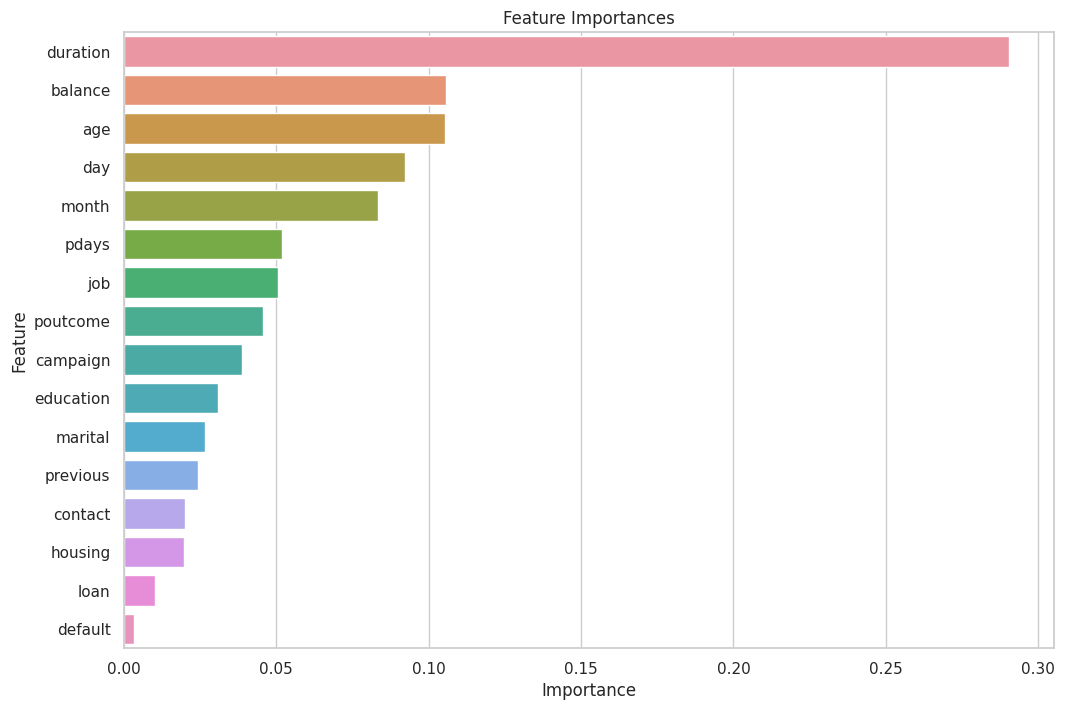

,Feature,Importance
11,duration,0.290557
5,balance,0.105800
0,age,0.105436
9,day,0.092174
10,month,0.083508
13,pdays,0.052059
1,job,0.050703
15,poutcome,0.045556
12,campaign,0.038802
3,education,0.030945


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare the data for training
# Convert categorical variables to numerical using Label Encoding
label_columns = df.select_dtypes(include=['object']).columns
df_encoded = df.copy()
label_encoder = LabelEncoder()
for column in label_columns:
    df_encoded[column] = label_encoder.fit_transform(df[column])

# Separate features and target variable
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

feature_importance_df


**Most Important Features:**
* Duration: This is the most important feature with an importance of approximately 0.29. This aligns with our earlier correlation analysis.
* Balance and Age: These are also important features, each with an importance around 0.10.
* Day and Month: These features have importance levels around 0.09 and 0.08, respectively.

**Least Important Features:**
* Default: This has the least importance, close to 0.003.
* Loan: This feature also has a low importance, around 0.01.